In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
salesdata = pd.read_csv(r"C:\\Users\\HP\\Downloads\\mybooks\\project\\ads-proj\\ad-sales-ml-proj\\data\\ads2.csv",  sep = ',', header=0)


In [3]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [4]:
salesdata.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [17]:
salesdata['ROI'] = salesdata[['Radio', 'TV', 'Social Media']].sum(axis=1)/salesdata['Sales']

In [18]:
salesdata.head()

,TV,Radio,Social Media,Influencer,Sales,ROI
0,16.0,6.566231,2.907983,Mega,54.732757,0.465429
1,13.0,9.237765,2.409567,Mega,46.677897,0.528030
2,41.0,15.886446,2.913410,Mega,150.177829,0.398194
3,83.0,30.020028,6.922304,Mega,298.246340,0.402159
4,15.0,8.437408,1.405998,Micro,56.594181,0.438975


# EDA

DISTRIBUTION OF REVENUE

[]

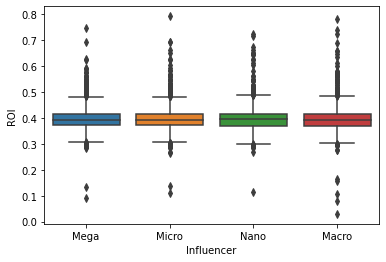

In [19]:
sns.boxplot(data =salesdata, x = "Influencer", y = "ROI")
plt.plot()

c:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[]

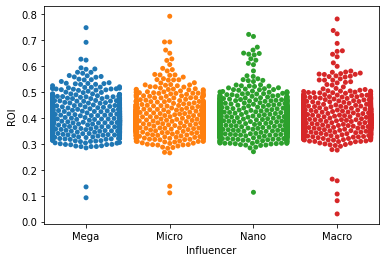

In [20]:
sns.swarmplot(data = salesdata, x = "Influencer", y = "ROI")
plt.plot()

<AxesSubplot:xlabel='Influencer', ylabel='Sales'>

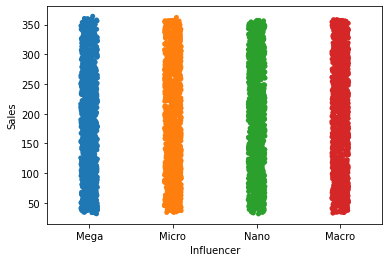

In [ ]:
sns.stripplot(data = salesdata, x = "Influencer", y = "Sales")

The range of distribution as shown in this chart is nearly the same for all various Influencer types used during marketing per each budget. It is likely that the type of influencer used in marketing has very little impact on the revenue generated.
Further analysis with A/B testing is necessary to assert that the distribution is consistent with the distribution produced.

Media-Sales Influence

In [ ]:
# to assess which of the media has the highest correlation with revenue

corr_data = salesdata[['TV', 'Radio', 'Social Media', 'Sales']]


In [ ]:
corr = corr_data.corr()

<AxesSubplot:>

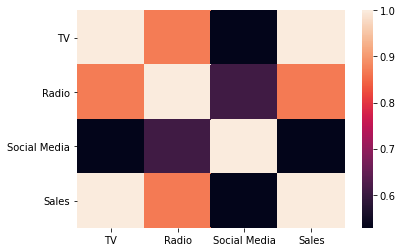

In [ ]:
sns.heatmap(corr)

From the above visual, Social Media seems to have the least impact on the resulting revenue from the campaigns.


An A/B test will ascertain the relevance of the variations/ correlations and proof their statistical significance.